In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("taxi_1m.csv")

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,c49f0ddc62fe52ff6d19832b7168a6818f17d8ccb7f59a...,2015-10-15 22:30:00+00:00,2015-10-15 22:45:00+00:00,1080.0,8.4,NaN,NaN,14.0,NaN,21.45,0.00,0.0,5.0,26.45,Cash,Taxi Affiliation Services,41.968069,-87.721559,NaN,NaN
1,1e5b69c83640bd5225fb3ccc33bc989b859f3e4cdb59f6...,2015-10-15 01:00:00+00:00,2015-10-15 01:15:00+00:00,720.0,7.6,NaN,NaN,14.0,NaN,17.25,0.00,0.0,0.0,17.25,Cash,Dispatch Taxi Affiliation,41.968069,-87.721559,NaN,NaN
2,d3a5f1452b4a1db2a547e7a0aabfe28d67c62b0e40155f...,2015-10-30 02:15:00+00:00,2015-10-30 02:45:00+00:00,1500.0,18.3,NaN,NaN,14.0,NaN,37.25,7.65,0.0,1.0,45.90,Credit Card,Dispatch Taxi Affiliation,41.968069,-87.721559,NaN,NaN
3,b4536ae68b6ac3fbe936c28e5c6739c9145a08443e70a7...,2015-10-30 21:00:00+00:00,2015-10-30 21:00:00+00:00,0.0,0.0,NaN,NaN,14.0,NaN,3.25,0.00,0.0,0.0,3.25,Cash,Taxi Affiliation Services,41.968069,-87.721559,NaN,NaN
4,ad33dffdd6cd00795ea1a00a6a6db1a38482075d532b55...,2015-09-26 08:30:00+00:00,2015-09-26 08:45:00+00:00,720.0,3.6,NaN,NaN,14.0,NaN,10.65,0.00,0.0,0.0,10.65,Cash,Dispatch Taxi Affiliation,41.968069,-87.721559,NaN,NaN


In [14]:
df.shape

(1000000, 22)

In [7]:
# Drop unique_key, row id has same meaning for us
df.drop(columns=["unique_key"], inplace=True)

In [8]:
df.columns

Index(['taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'pickup_census_tract', 'dropoff_census_tract',
       'pickup_community_area', 'dropoff_community_area', 'fare', 'tips',
       'tolls', 'extras', 'trip_total', 'payment_type', 'company',
       'pickup_latitude', 'pickup_longitude', 'pickup_location',
       'dropoff_latitude', 'dropoff_longitude', 'dropoff_location'],
      dtype='object')

In [17]:
# Check added info of pickup/dropoff location
print(df[pd.isna(df.pickup_location) ^ (pd.isna(df.pickup_latitude) | pd.isna(df.pickup_longitude))].shape[0])
print(df[pd.isna(df.dropoff_location) ^ (pd.isna(df.dropoff_latitude) | pd.isna(df.dropoff_longitude))].shape[0])

0
0


In [20]:
# Drop pickup/dropoff location as they do not contain any additional info
df.drop(columns=["pickup_location", "dropoff_location"], inplace=True)

In [21]:
# Check for mislabelad lat/lon
print(df.pickup_latitude.min(), df.pickup_latitude.max())
print(df.pickup_longitude.min(), df.pickup_longitude.max())
print(df.dropoff_latitude.min(), df.dropoff_latitude.max())
print(df.dropoff_longitude.min(), df.dropoff_longitude.max())

41.660136051 42.021223593
-87.913624596 -87.53490290100001
41.660136051 42.016046492
-87.913624596 -87.53490290100001


In [22]:
# All seems valid
# Nothing to do ...

# Plot trip time, distance, fare, tips, tolls, extras, trip_total

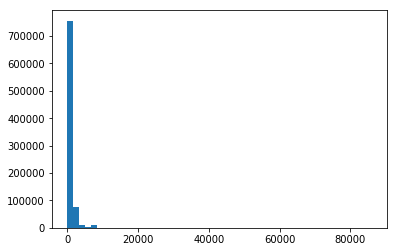

In [24]:
plt.hist(df.trip_seconds, bins=50);

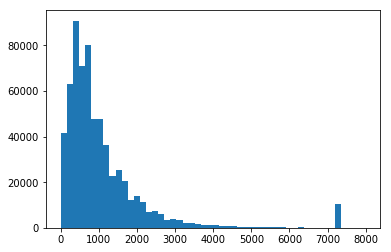

In [34]:
plt.hist(df.trip_seconds[(0 < df.trip_seconds) & (df.trip_seconds < 8000)], bins=50);

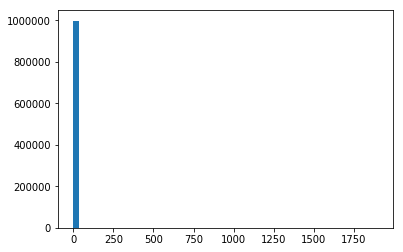

In [35]:
plt.hist(df.trip_miles, bins=50);

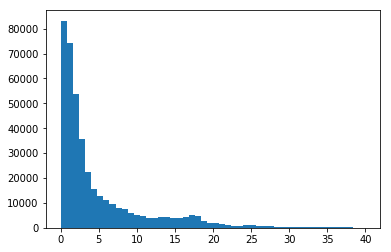

In [38]:
plt.hist(df.trip_miles[(0 < df.trip_miles) & (df.trip_miles < 40)], bins=50);

In [47]:
print("# trips longer than 100 miles:", (df.trip_miles > 100).sum())

# trips longer than 100 miles: 299


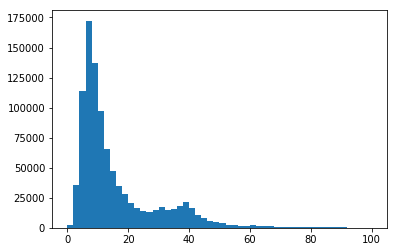

In [51]:
plt.hist(df.fare[(0 < df.fare) & (df.fare < 100)], bins=50);

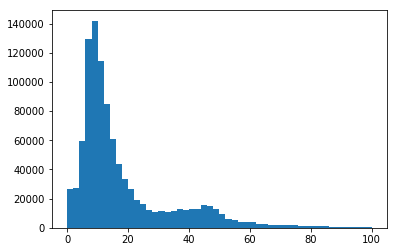

In [52]:
plt.hist(df.trip_total[(df.trip_total < 100)], bins=50);

In [107]:
labels = []
ys = []
stds = []
percents = []
for low in range(0,150,5):
    high = low + 5
    labels.append(high)
    rows = df[(df.trip_total >= low) & (df.trip_total < high)]
    ys.append([rows.fare.mean(), rows.tips.mean(), rows.tolls.mean(), rows.extras.mean()])
    stds.append([rows.fare.std(), rows.tips.std(), rows.tolls.std(), rows.extras.std()])
    percents.append([np.mean(rows.fare/rows.trip_total),
                     np.mean(rows.tips/rows.trip_total),
                     np.mean(rows.tolls/rows.trip_total),
                     np.mean(rows.extras/rows.trip_total)])
    
ys = np.array(ys).T
stds = np.array(stds).T
percents = np.array(percents).T

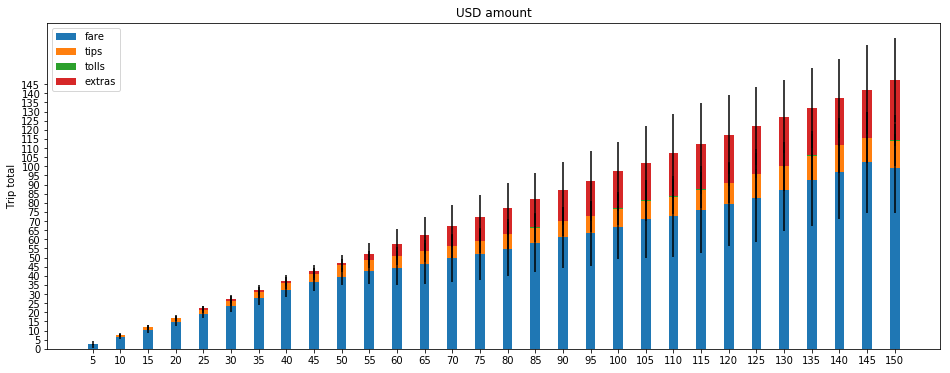

In [108]:
plt.figure(figsize=(16,6))
idx = np.arange(len(labels))
width = 0.35       # the width of the bars: can also be len(x) sequence

bottom = np.zeros(len(labels))
for y, std, label in zip(ys, stds, ["fare", "tips", "tolls", "extras"]):
    plt.bar(idx, y, width, yerr=std, label=label, bottom=bottom)
    bottom = bottom + y

plt.ylabel('Trip total')
plt.title('USD amount')
plt.xticks(idx, labels)
plt.yticks(np.arange(0, 150, 5))

plt.legend(loc="upper left")
plt.show()

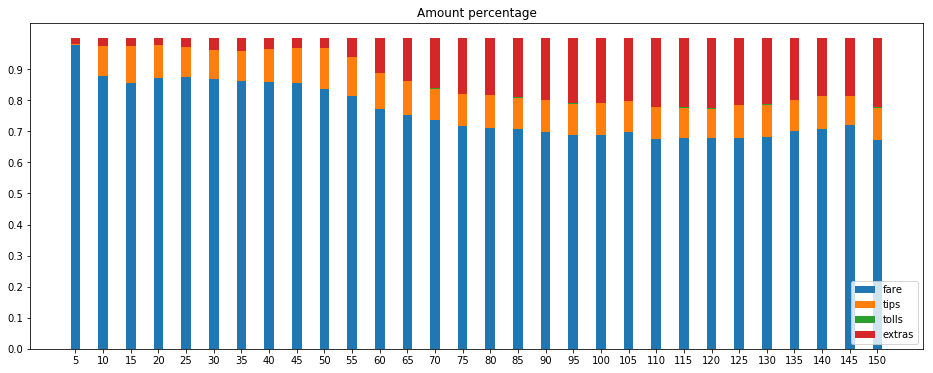

In [112]:
plt.figure(figsize=(16,6))
idx = np.arange(len(labels))
width = 0.35       # the width of the bars: can also be len(x) sequence

bottom = np.zeros(len(labels))
for p, label in zip(percents, ["fare", "tips", "tolls", "extras"]):
    plt.bar(idx, p, width, label=label, bottom=bottom)
    bottom = bottom + p

plt.title('Amount percentage')
plt.xticks(idx, labels)
plt.yticks(np.arange(0, 1, .1))

plt.legend(loc="lower right")
plt.show()